# Tutorial 6: Differentiable optimization

## Why sorting and ranking is not differentiable?

### Notation

Let $\theta = (\theta_1, \dots, \theta_n) \in \mathbb{R}^n$. 
We denote a permutation of $[n]$ by $\sigma = (\sigma_1, \dots,
\sigma_n)$ and its inverse by $\sigma^{-1}$.


We define the argsort of $\theta$ as the indices sorting $\theta$,
i.e.,
$$
\sigma(\theta) = (\sigma_1(\theta), \dots,
\sigma_n(\theta)),
$$
where $\theta_{\sigma_1(\theta)} \ge \dots \ge \theta_{\sigma_n(\theta)}$.
If some of the coordinates of $\theta$ are equal, we break ties arbitrarily. 

We define the sort of $\theta$ as the values of $\theta$ in
descending order, i.e.,
$$
    s(\theta) = \theta_{\sigma(\theta)}.
$$

We define the rank of $\theta$ as the function evaluating at coordinate $j$ to the position of $\theta_j$ in the descending sort (smaller rank $r_j(\theta)$ means that $\theta_j$ has higher
value). It is formally equal to the argsort's inverse permutation, i.e.,
$$
    r(\theta) = \sigma^{-1}(\theta).
$$
For instance, if $\theta_3 \geq \theta_1 \geq \theta_2$, then 
$\sigma(\theta) = (3, 1, 2)$, 
$s(\theta) = (\theta_3, \theta_1, \theta_2)$ and
$r(\theta) = (2, 3, 1)$.

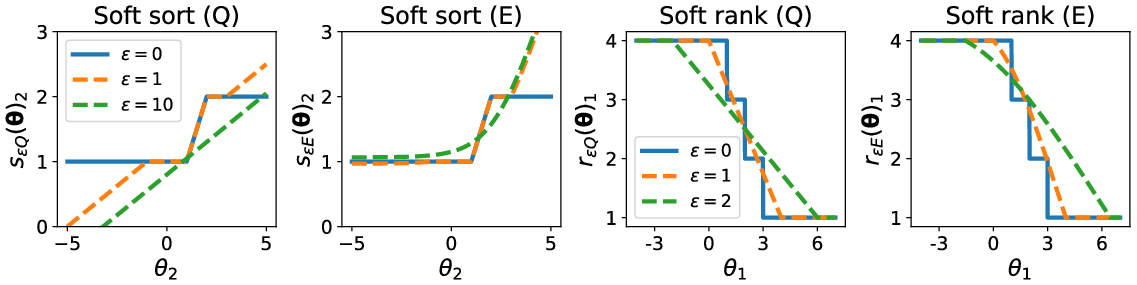

In [17]:
from wand.image import Image as WImage
img = WImage(filename='figures/smoothness.pdf', resolution=120)
img


(figure from "Fast Differentiable Sorting and Ranking"). We take the vector $\theta = (0, 3, 1, 2)$, vary one of its coordinates $\theta_i$ and look at how $[s_{\varepsilon \Psi}(\theta)]_i$ and $[r_{\varepsilon \Psi}(\theta)]_i$ change in response.

For example, if $\theta_2<0$, the sorting is $(2,1,0,\theta_2)$ and thus $s(\theta)_2 = 1$. If $1<\theta_2<2$, the sorting is $(2,\theta_2,1,0)$ and thus $s(\theta)_2 = \theta_2$.

So, the sorting is differentiable almost everywhere and its Jacobian is one of permutation. However, one may argue that it is non-differentiable in "most important" points (i.e., when two elements swap).
Ranking, even worse, is piecewise constant and thus has either zero or undefined gradients.

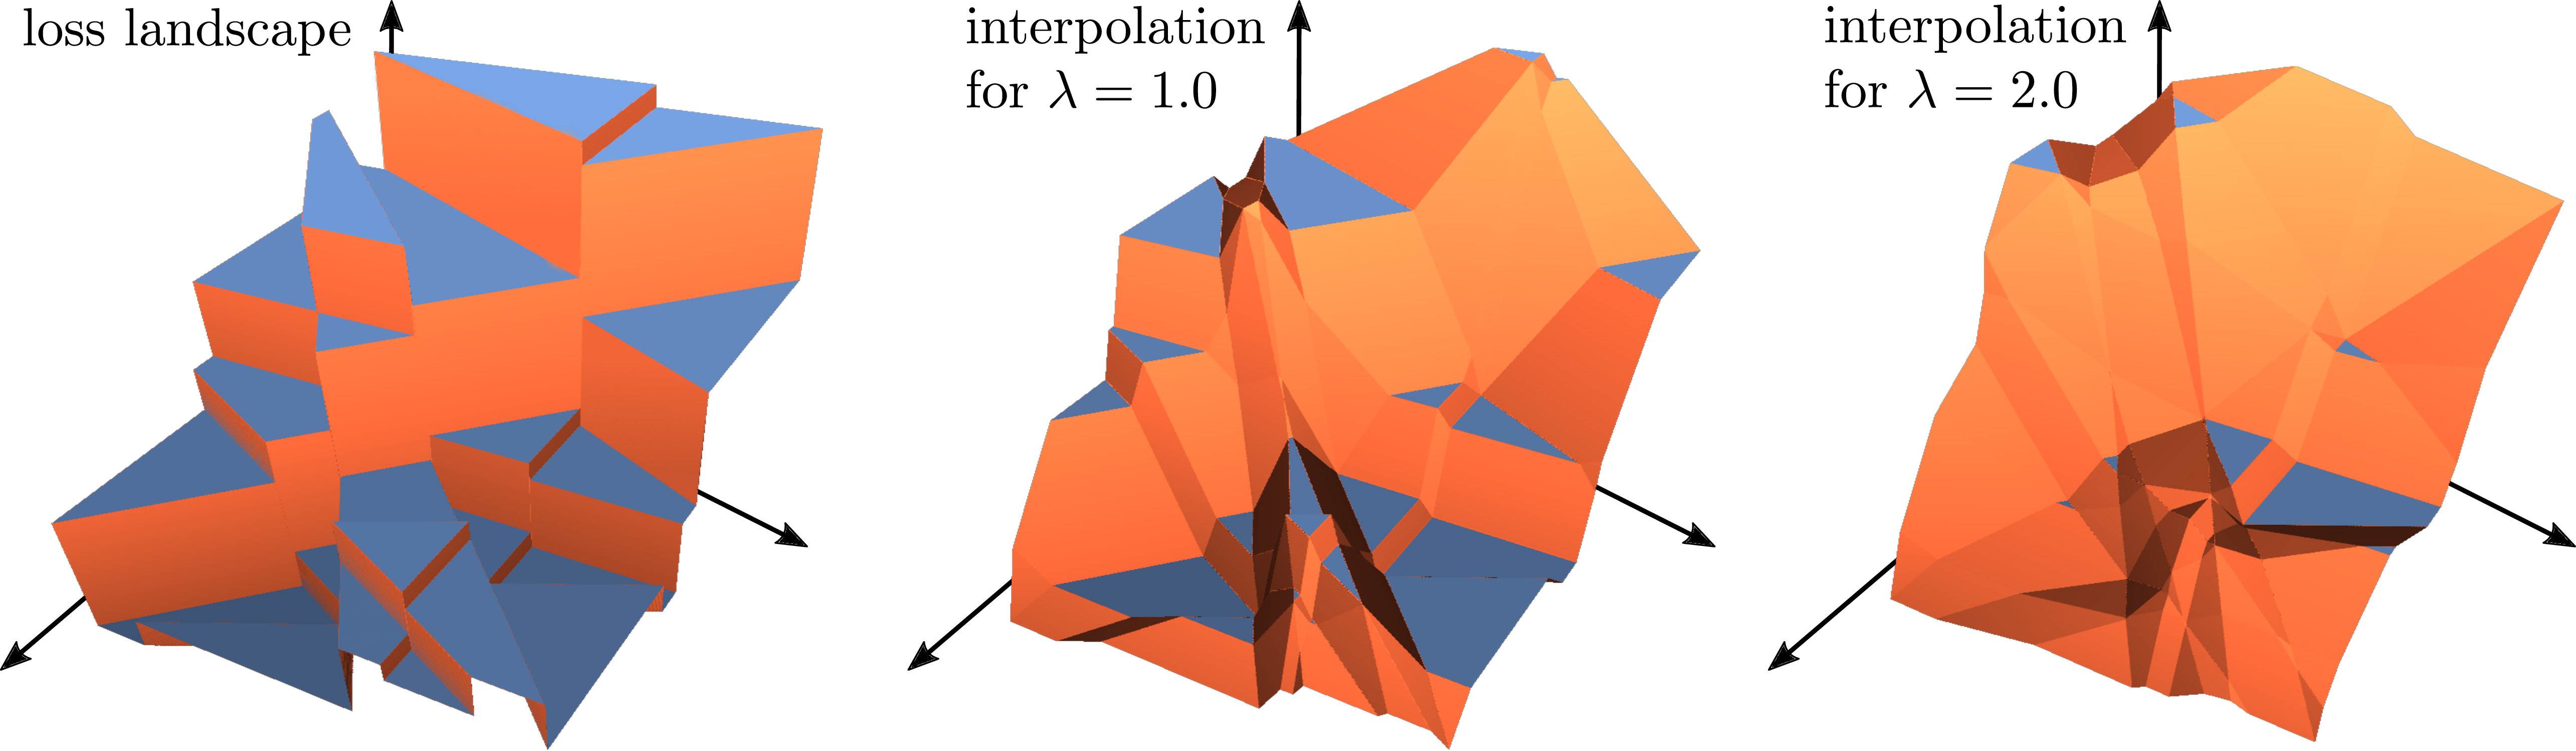

In [18]:
from wand.image import Image as WImage
img = WImage(filename='figures/flambda_2D_ranking.pdf', resolution=120)
img

## Fast Differentiable Sorting and Ranking

### More notations
We denote the set of $n!$ permutations of $[n]$ by $\Sigma$.
We define the reversing permutation by $\rho = (n, n-1, \dots, 1)$.

W alsoe introduce the permutahedron induced by a vector $w \in \mathbb{R}^n$, the
convex hull of permutations of $w$:
$$
\mathcal{P}(w) = \mathrm{conv}(\{ w_\sigma \colon \sigma \in \Sigma \}) \subset \mathbb{R}^n.
$$

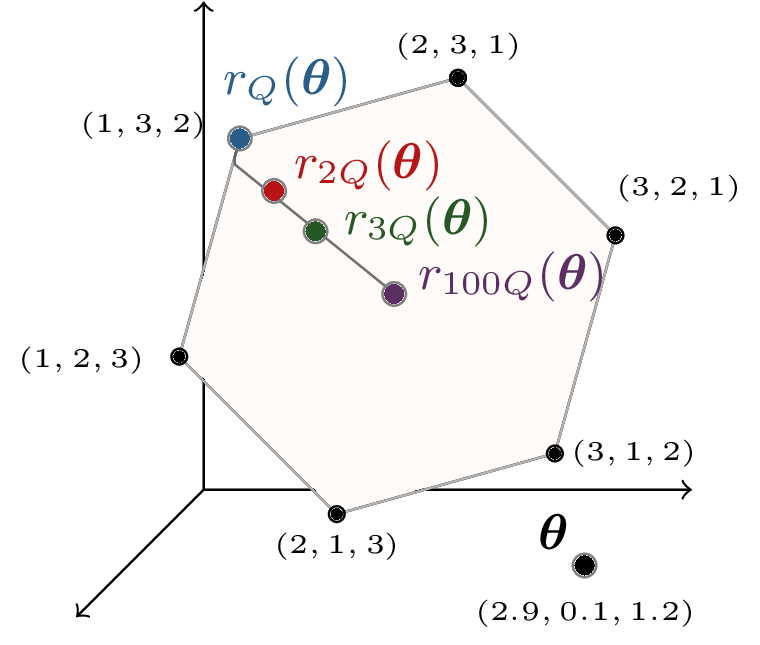

In [19]:
from wand.image import Image as WImage
img = WImage(filename='figures/permutahedron.pdf', resolution=400)
img



Let $z, w \in \mathbb{R}^n$ and consider the formulation of sorting as linear program $s(\theta) = \arg\max_{\mu \in \mathcal{P}(\theta)} \langle \mu, \rho \rangle$ (we want largest number with largest rank and so on). 

We can regularize, for example, quadratically:
$$P_Q(\rho, \theta) =  \arg\max_{\mu \in \mathcal{P}(\theta)} \langle \mu, \rho \rangle -\|\mu   \|^2 =   \arg\min_{\mu \in \mathcal{P}(\theta)}  \|\mu - \rho \|^2,$$
which is the Euclidean projection of $\rho$ onto $\mathcal{P}(\theta)$.

### Soft sorting

We define the $Q$-regularized soft sort as 
$$
s_{\varepsilon Q}(\theta) 
= P_{\varepsilon Q}(\rho, \theta)
= P_{Q}\left(\frac{\rho}{\varepsilon}, \theta\right).
$$


### Properties of $s_{\varepsilon Q}(\theta)$ 

1. **Differentiability.**
For all $\varepsilon > 0$, $s_{\varepsilon Q}(\theta)$ is differentiable (a.e.) w.r.t. $\theta$.

2. **Order preservation.**
Let $s = s_{\varepsilon Q}(\theta)$ and $\sigma = \sigma(\theta)$.
For all $\theta \in \mathbb{R}^n$ and $0 < \varepsilon < \infty$, we have
$s_1 \ge s_2 \ge \dots \ge s_n$

3. **Asymptotics.**
For all $\theta \in \mathbb{R}^n$ without ties:
$$s_{\varepsilon Q}(\theta) \xrightarrow[\varepsilon \to 0]{} s(\theta)$$
$$s_{\varepsilon Q}(\theta)  \xrightarrow[\varepsilon \to \infty]{} f_Q(\theta) \cdot 1$$
where
$f_Q(u) = \mathrm{mean}(u)$.

## Fast computation of $s_{\varepsilon Q}(\theta)$ 
Computing of soft sorting and ranking operators boils down to projecting onto a permutahedron.


For all $\rho \in \mathbb{R}^n$ and sorted $\theta \in \mathbb{R}^n$ we have
$$
    P_Q(\rho, \theta) = \rho - v_Q(\rho_{\sigma(\rho)}, \theta)_{\sigma^{-1}(\rho)}
$$
where
$$
v_Q(s, \theta) =
\arg\min_{v_1 \ge \dots \ge v_n} \frac{1}{2} \|v - (s - \theta)\|^2 = \arg\min_{v_1 \ge \dots \ge v_n} \frac{1}{2} \sum_{j=1}^n (v_j - (s_j - \theta_j))^2.
$$
This problem of form
$$
\arg\min_{v_1 \ge \dots \ge v_n} \sum_{j=1}^n (v_j - y_j)^2
$$
is called isotonic regression and the  constraint $v_1 \ge \dots \ge v_n$  is  called  the  simple  chain or  monotonicity  constraint.  

The solution of isotonic regression is given by partition of $[n]$ into blocks $\mathcal{B}_j$, and in each block it equals
$$
\gamma_Q(\mathcal{B}_j; s, \theta) =
\frac{1}{|\mathcal{B}_j|} \sum_{i \in \mathcal{B}_j} s_i - w_i 
$$
and can be calculated in linear time (together with initial sorting it gives $\mathcal{O}(n \log(n))$ runtime. 

## Example of differntiable sorting application: top-k classification loss function

$0/1$-loss for class $y \in [n]$ and prediction vector $\hat{y}$ is defined as
$$
\mathcal{L}_{0/1}(\hat{y}, y) = H( r[\hat{y}]_l - 1),
$$
where $H$ is Heaviside function.

There are two sources of discontinuoty: $H$ and $r$. For $r$, we replace it with our soft ranking function. For $H$, we can replace it with some monotonic continuous function, e.g., ReLU:
$$
J_k(u) = \max(0, u-k+1)
$$

In [20]:
import matplotlib.pyplot as plt
import numpy as np

In [21]:
# SETUP
SMALL_SIZE = 10
MEDIUM_SIZE = 18
BIG_SIZE = 20
BIGGER_SIZE = 25

plt.rc('font', size=BIG_SIZE)  # controls default text sizes
plt.rc('axes', titlesize=BIGGER_SIZE)  # fontsize of the axes title
plt.rc('xtick', labelsize=BIGGER_SIZE)  # fontsize of the tick labels
plt.rc('ytick', labelsize=BIGGER_SIZE)  # fontsize of the tick labels
plt.rc('legend', fontsize=17)  # legend fontsize
plt.rc('figure', titlesize=BIG_SIZE)  # fontsize of the figure title
# plt.rc('text', usetex=True)
plt.rcParams['axes.axisbelow'] = True

# https://sashat.me/2017/01/11/list-of-20-simple-distinct-colors/
colors = [(230, 25, 75), (60, 180, 75),  # (255, 225, 25),
          (0, 130, 200), (245, 130, 48),
          # (70, 240, 240),
          (240, 50, 230),
          (250, 190, 212), (0, 128, 128),
          (220, 190, 255), (170, 110, 40), (255, 250, 200), (128, 0, 0),
          (170, 255, 195), (0, 0, 128), (128, 128, 128), (255, 255, 255), (0, 0, 0)]
#        (255, 250, 200),(170, 255, 195), #seemingly bad
# (250, 190, 190),  (128, 128, 0), (0, 128, 128), (255, 215, 180),(128, 128, 128),(230, 25, 75)] #untested
colors = [[x[0] / 255., x[1] / 255., x[2] / 255.] for x in colors]

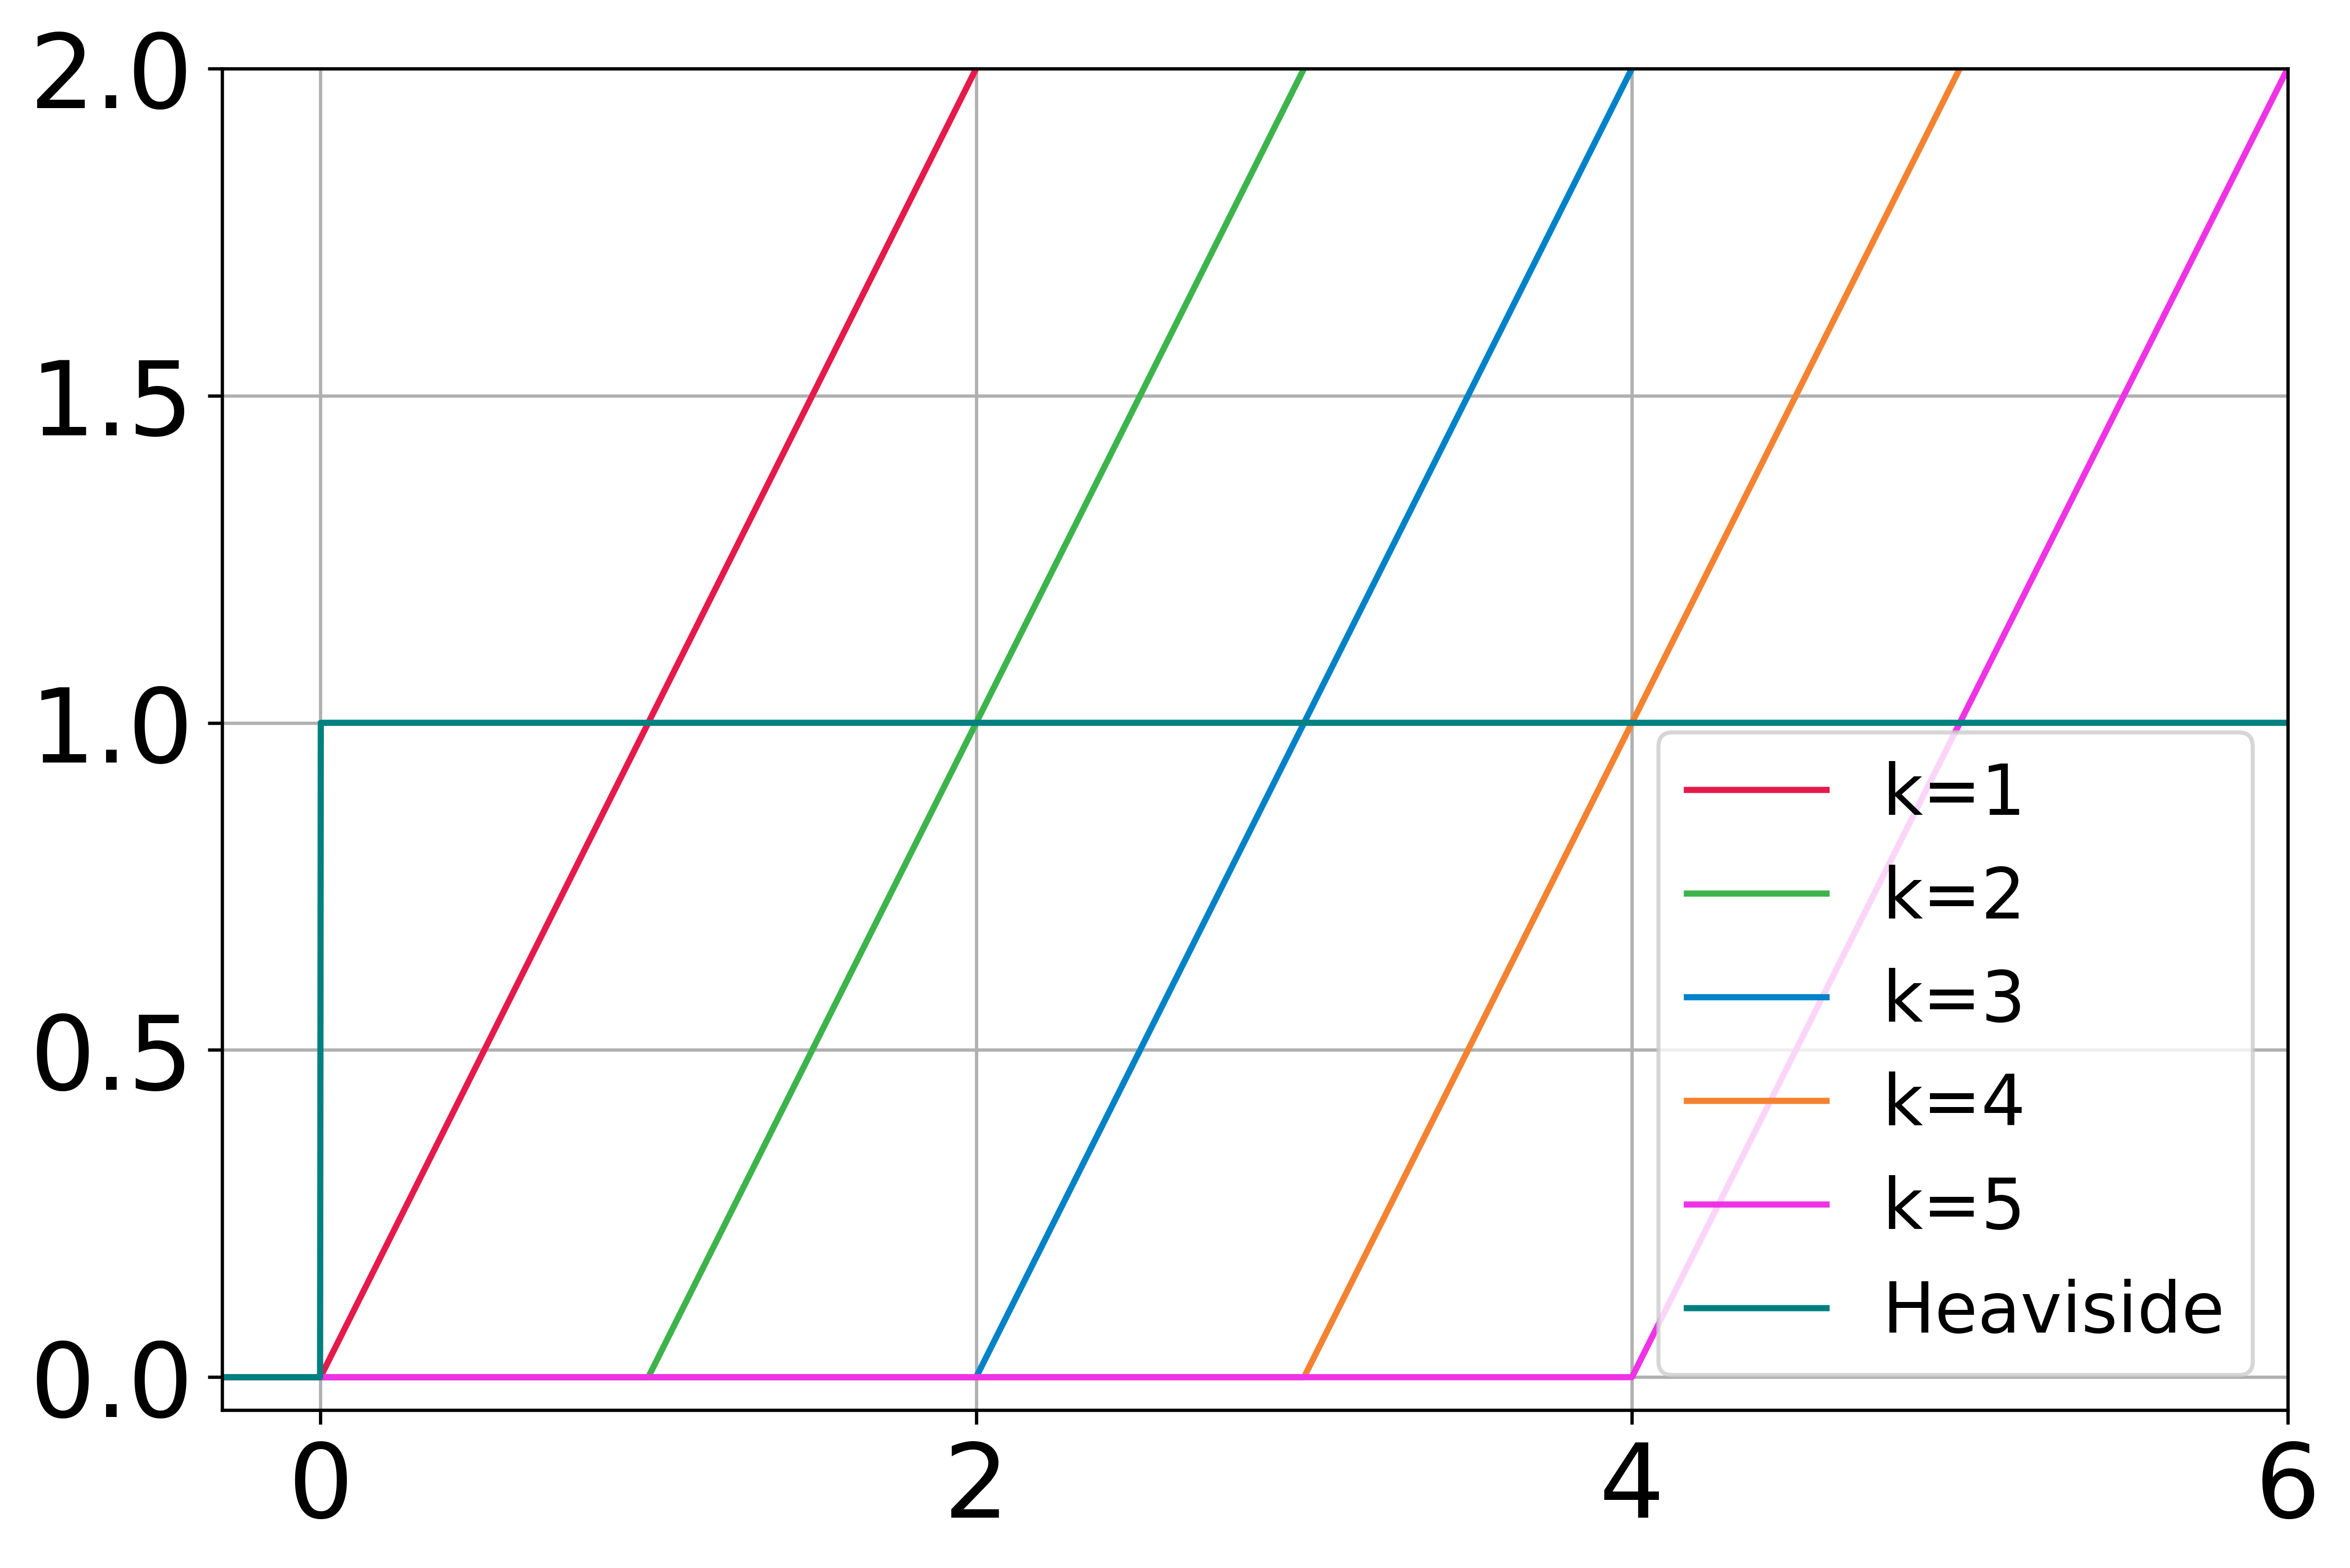

In [22]:
fig = plt.figure(figsize=(9, 6), dpi=600)

x = np.linspace(-1, 10, 5000)
for k in range(1, 6):
    plt.plot(x, np.clip(x - k + 1, 0, 10000), color=colors[k - 1], label='k={}'.format(k))

plt.plot(x, (x > 0), color=colors[6], label='Heaviside')
plt.xlim(-0.3, 6)
plt.ylim(-0.05, 2)
plt.legend()
plt.grid()

In [23]:
import sys

sys.path.append('fast-soft-sort')

In [24]:
import torch
from torch import nn
from torch.nn import functional as F
from fast_soft_sort.pytorch_ops import soft_rank, soft_sort


def rank_loss(pred, y, regularization_strength=1.0, k=1, device='cpu'):
    ranks = soft_rank(-pred.cpu(), regularization_strength=regularization_strength).to(device)
    y_rank = torch.gather(ranks, 1, y.unsqueeze(-1))
    return F.relu(y_rank - k)


class RankLoss(nn.Module):
    def __init__(self, regularization_strength=0.01, k=1, device='cpu'):
        super(RankLoss, self).__init__()
        self.regularization_strength = regularization_strength
        self.k = k
        self.device = device

    def forward(self, pred, y):
        return rank_loss(pred, y, self.regularization_strength, self.k, device=self.device).mean()
    
    def to(self, device):
        self.device = device
        return self

In [25]:
from tqdm.notebook import trange, tqdm

In [26]:
batch_size = 128
workers = 8
root = './data'

device = 'cuda:0'

In [27]:
import torchvision

normalize = torchvision.transforms.Normalize(mean=[0.491, 0.482, 0.447], std=[0.247, 0.243, 0.262])

train_transform = torchvision.transforms.Compose([
        torchvision.transforms.RandomCrop(size=(32, 32), padding=4),
        torchvision.transforms.RandomHorizontalFlip(),
        torchvision.transforms.ToTensor(),
        normalize
    ])

test_transform = torchvision.transforms.Compose([
        torchvision.transforms.ToTensor(),
        normalize
    ])

    
train_dataset = torchvision.datasets.CIFAR10(root, train=True, transform=train_transform, download=True)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=batch_size, num_workers=workers)

val_dataset = torchvision.datasets.CIFAR10(root, train=True, transform=test_transform, download=True)
val_loader = torch.utils.data.DataLoader(val_dataset, batch_size=batch_size, num_workers=workers)

Files already downloaded and verified
Files already downloaded and verified


In [28]:
model = torchvision.models.resnet18(num_classes=10)

criterion = RankLoss()
model, criterion = model.to(device), criterion.to(device)

lr = 1e-4
weight_decay = 2e-5
optimizer = torch.optim.AdamW(model.parameters(), lr=lr, weight_decay=weight_decay)


In [29]:
def correct(output, target, topk=(1,)):
    """Computes the correct@k for the specified values of k"""
    maxk = max(topk)

    _, pred = output.topk(maxk, 1, True, True)
    pred = pred.t().type_as(target)
    corr = pred.eq(target.view(1, -1).expand_as(pred))

    res = []
    for k in topk:
        correct_k = corr[:k].flatten().float().sum(0).item()
        res.append(correct_k)
    return res

In [30]:
def run_epoch(model, criterion, optimizer, loader, device, writer, experiment_name, epoch, iteration, train=False):
    total_loss = 0
    correct1 = 0
    mode = 'train' if train else 'val'
    if train:
        model.train()
    else:
        model.eval()
    with torch.set_grad_enabled(train):
        for batch_index, (x, y) in enumerate(tqdm(loader)):
            x, y = x.to(device), y.to(device)
            pred = model(x)
            loss = criterion(torch.softmax(pred, dim=1), y)

            if train:
                optimizer.zero_grad()
                loss.backward()
                optimizer.step()

            total_loss += loss.item()
            corr = correct(pred, y)
            correct1 += corr[0]

            writer.add_scalars(f'batch/{mode}_loss', {experiment_name: loss.item()}, iteration)
            writer.add_scalars(f'batch/{mode}_top1', {experiment_name: corr[0] / x.shape[0]},
                               iteration)
            iteration += 1
    total_loss /= len(loader)
    writer.add_scalars('epoch/loss', {experiment_name + f'_{mode}': total_loss}, epoch)
    writer.add_scalars('epoch/top1', {experiment_name + f'_{mode}': correct1 / len(loader.sampler)}, epoch)
    return iteration, correct1 / len(loader.sampler)

In [31]:
import os

from torch.utils.tensorboard import SummaryWriter

train_it, val_it = 0, 0
experiment_name = 'diff_sort_loss'

save_path = './results/cifar10'
os.makedirs(save_path, exist_ok=True)

writer = SummaryWriter(log_dir=save_path)

In [32]:
for epoch in trange(100):
    train_it, _ = run_epoch(model, criterion, optimizer, train_loader, device, writer, experiment_name, epoch, train_it, train=True)
    val_it, _ = run_epoch(model, criterion, optimizer, val_loader, device, writer, experiment_name, epoch, val_it, train=False)

  0%|          | 0/100 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]

  0%|          | 0/391 [00:00<?, ?it/s]